In [5]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Readind data

df = pd.read_csv(r'C:\Users\nakul\Downloads\new\movies.csv')

In [6]:
# Glimpse of data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
# checking for missing files in percentage

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [8]:
# Checking data types of each column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# Dropping Missing valued rows
df.dropna(inplace = True)


In [10]:
# Converting data types

df['budget'] = df['budget'].astype('int64')
df['gross'] = df ['gross'].astype('int64')
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [40]:
 # Creating a new column and taking only the year from released date column
    
df['UpdatedYear'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,UpdatedYear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [39]:
# Displaying maximum rows

pd.set_option('display.max_rows',None)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0


In [38]:
# Sorting according to highest grossing

df.sort_values(by=['gross'], ascending = False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0


In [43]:
# Dropping Duplicate Items

df['company'].drop_duplicates().head(20)


0     1426
1      452
2      945
3     1108
4     1083
6     1397
7      390
8      548
9     1391
10    1338
11     320
14     661
15    1184
17     815
18      45
20     939
21    1114
22     306
28    1382
33     372
Name: company, dtype: int16

Text(0, 0.5, ' GROSS EARNINGS')

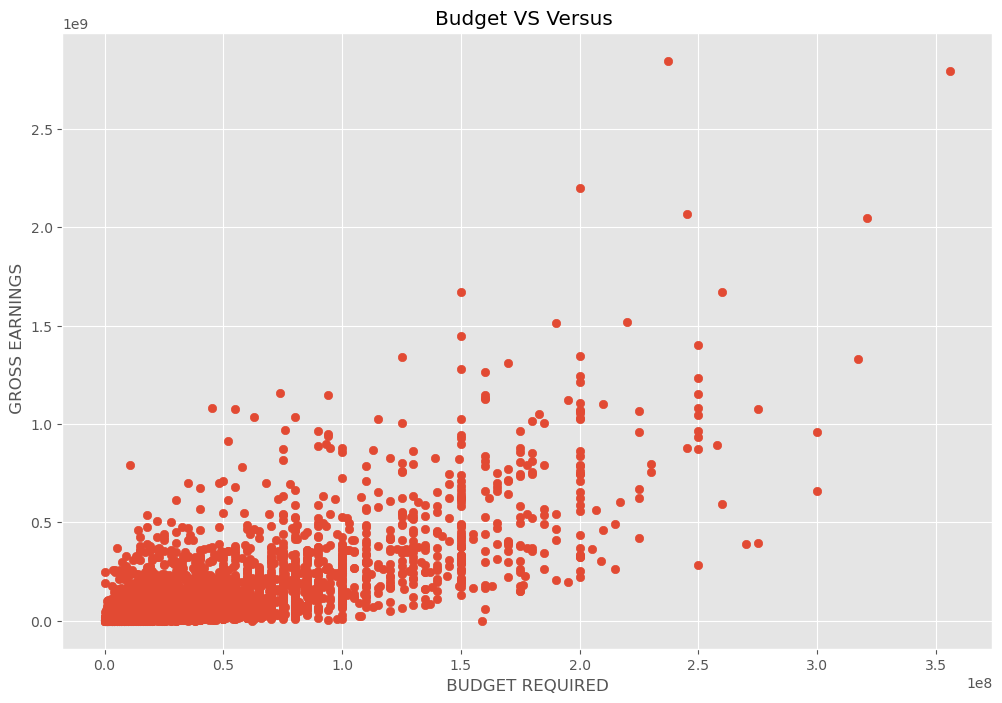

In [49]:
 # Building a scatter plot with budget versus gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title("Budget VS Versus ")
plt.xlabel(" BUDGET REQUIRED ")
plt.ylabel(" GROSS EARNINGS")


<AxesSubplot:xlabel='budget', ylabel='gross'>

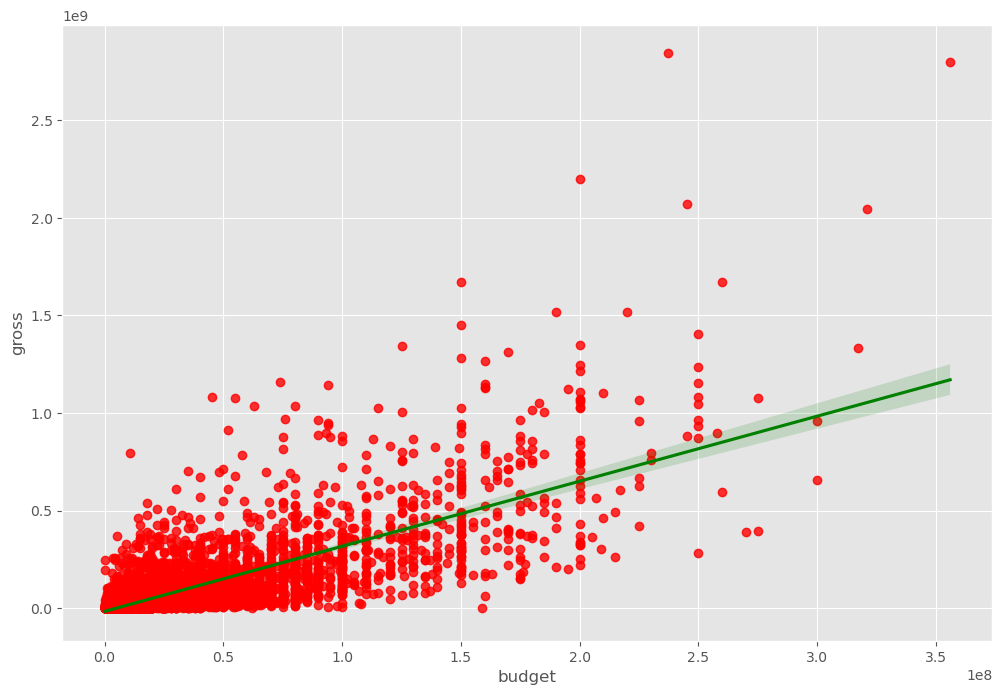

In [52]:
# Using seaborn on scatter plot

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color": "red"}, line_kws={"color":"green"})

In [36]:
# CORRELATION

df.corr(method = 'pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gross,0.005639,-0.181906,-0.244101,0.274321,0.008501,0.222556,0.614751,-0.029560,-0.035885,-0.000004,0.060078,0.740247,1.000000,0.149553,0.275796
company,0.021697,-0.092357,-0.071334,-0.014333,-0.002407,0.020656,0.118470,-0.008223,-0.003697,0.014082,0.048569,0.170235,0.149553,1.000000,0.037585
runtime,0.010850,0.140792,-0.059237,0.075077,0.008975,0.414068,0.352303,0.017433,-0.017561,0.010108,-0.034477,0.318695,0.275796,0.037585,1.000000


In [55]:
# CORRELATION WITH KENDALL

df.corr(method='kendall')

,year,score,votes,budget,gross,runtime,UpdatedYear
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824,0.991304
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254,0.043400
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344,0.293044
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278,0.213719
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979,0.232372
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000,0.064793
UpdatedYear,0.991304,0.043400,0.293044,0.213719,0.232372,0.064793,1.000000


In [56]:
# CORRELATION WITH SPEARMAN

df.corr(method='spearman')

,year,score,votes,budget,gross,runtime,UpdatedYear
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444,0.998694
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155,0.063674
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621,0.422988
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794,0.302535
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400,0.340529
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000,0.095507
UpdatedYear,0.998694,0.063674,0.422988,0.302535,0.340529,0.095507,1.000000


In [1]:
# Found out High correlation between Budget and Gross!


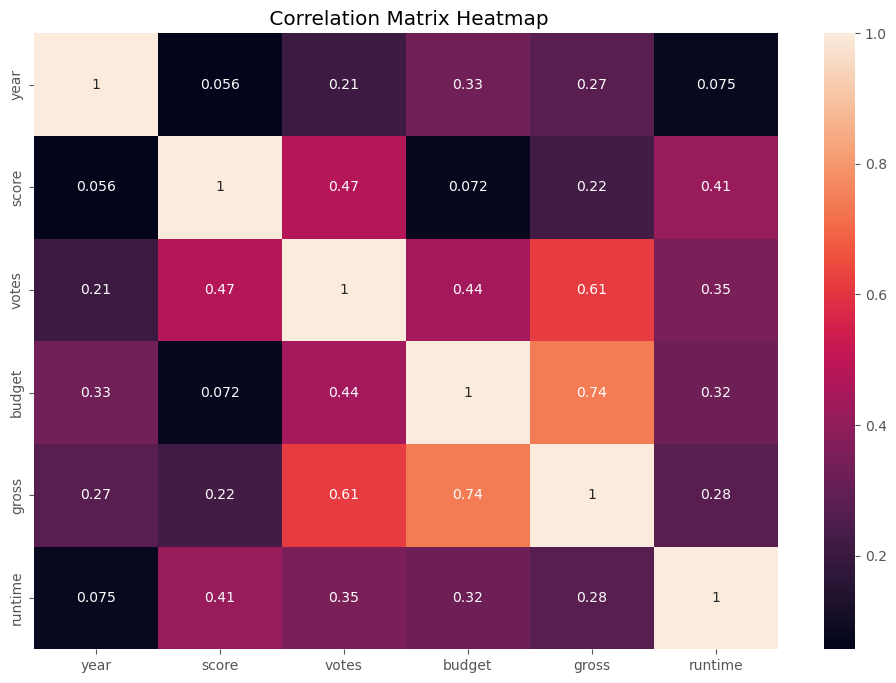

In [14]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title(" Correlation Matrix Heatmap")


plt.show()

In [37]:
# Converting data types of column like City,Company to category to find correlation
# as correlation can only happen between numericals
# we'll aslo be using cat.codes to randomise and give numericals to each columns

df_numerized = df

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0


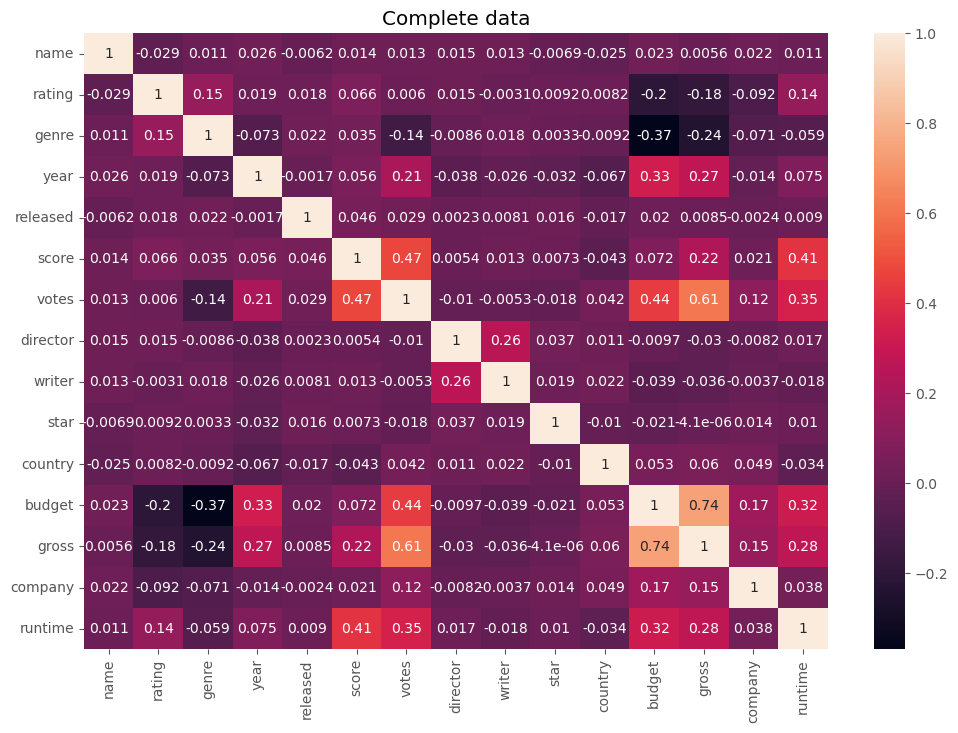

In [33]:
# Checking Heatmap to find correlation using updated data ( df_numerized )
# Goal was to include columns like company,city columns to add into the heatmap
 
correlation_matrix2 = df_numerized.corr(method = "pearson")

sns.heatmap(correlation_matrix2, annot = True)

plt.title("Complete data")

plt.show()

In [ ]:
# VOTES AND BUDGET HAVE THE HIGHEST CORRELATION!!